In [3]:
import os
print (os.getcwd())

/Users/wangjing/Desktop/学习/考研&国考&题库考资料整理信息资源管理/复试/数据科学/练习


In [36]:
import pandas as pd
df_women=pd.read_csv('woman.csv',index_col=0)
#dataframe格式就类似于关系表，与矩阵不同，可以存在文本
print(df_women.head())

   weight  height
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


In [9]:
#查看形状，15行，2列
df_women.shape

(15, 2)

In [10]:
#查看数据简要信息
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  15 non-null     int64
 1   weight  15 non-null     int64
dtypes: int64(2)
memory usage: 360.0 bytes


In [11]:
#查看列名
print(df_women.columns)

Index(['height', 'weight'], dtype='object')


In [37]:
#查看描述型统计信息
df_women.describe()

,weight,height
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


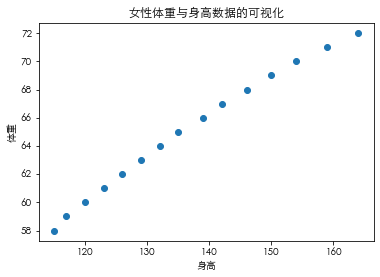

In [39]:
#数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
#不另弹出窗口
#@开始的是装饰器；%表示魔术命令，是jupyter notebook编辑器的开发
plt.rcParams["font.family"]='Heiti TC'
#设置汉字的字体。不同系统更改后面的字体名称即可。windows用’XimHei‘.不然要显示框框
plt.scatter(df_women['height'],df_women["weight"])
plt.title('女性体重与身高数据的可视化')
plt.xlabel('身高')
plt.ylabel('体重')
plt.show()

In [17]:
! pip install matplotlib

In [19]:
import matplotlib

In [58]:
#特征矩阵（X）的生成。表名+[]表示切片。此处X还不是特征矩阵，但matplotlib会在处理的时候自动转换。详见教材
X=df_women["height"]
X

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: height, dtype: int64

In [60]:
#目标向量（y）的生成
y=df_women["weight"]
y

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: weight, dtype: int64

In [61]:
#特征矩阵的规整化处理
import statsmodels.api as sm
X=sm.add_constant(X)#增加常数列，可以计算截距b的值，不增加不计算
X

,const,height
1,1.0,115
2,1.0,117
3,1.0,120
4,1.0,123
5,1.0,126
6,1.0,129
7,1.0,132
8,1.0,135
9,1.0,139
10,1.0,142


In [62]:
#构建模型。OLS是最小二乘法的缩写
myModel=sm.OLS(y,X)

In [63]:
#模型拟合.fit就是求参数的函数，经常有哦
results=myModel.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.811e+29
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          2.00e-186
Time:                        17:14:27   Log-Likelihood:                 429.73
No. Observations:                  15   AIC:                            -855.5
Df Residuals:                      13   BIC:                            -854.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.842e-14   2.23e-13      0.128      0.9

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [64]:
#回归系数
results.params
#可视化预测结果
y_predict=results.predict()
y_predict

array([58.7571168 , 59.33161526, 60.19336294, 61.05511062, 61.9168583 ,
       62.77860598, 63.64035366, 64.50210134, 65.65109825, 66.51284593,
       67.66184284, 68.81083974, 69.95983665, 71.39608278, 72.83232892])

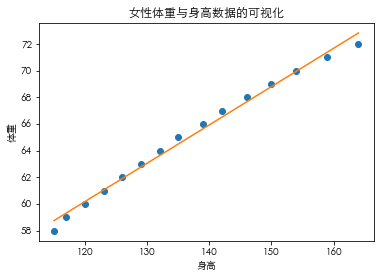

In [65]:
plt.rcParams["font.family"]='Heiti TC'
#设置汉字的字体。不同系统更改后面的字体名称即可。windows用’XimHei‘.不然要显示框框
plt.plot(df_women['height'],df_women["weight"],"o")#O表示圆点
plt.plot(df_women['height'],y_predict)#用原来的模型，拿到新的x后算新的y
plt.title('女性体重与身高数据的可视化')
plt.xlabel('身高')
plt.ylabel('体重')
plt.show()

In [1]:
#作业：用多项式回归再建模优化

NameError: name 'X' is not defined